<a href="https://colab.research.google.com/github/jaybabulkar/Exploratory-Data-Analysis-on-Car-Features/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis of Car Features***

## **Introduction **

## What is Exploratory Data Analysis?

Exploratory Data Analysis is an approach to a analyzing datasets to summarize their main characteristics often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. In short, EDA can show us hidden relationships and attributes present in our data even before we throw it at a Machine Learning level.

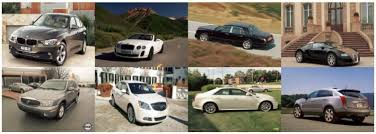
 
## How to build a Machine Learning model?
In this technological era, Machine Learning has approached the industry with wide range of benefits. Today almost all businesses have moved from business strategy to Machine Learning. This is because Machine Learning technologies offer a wide range of benefits which include higher productivity, lower customer churn, actionable data and much more. 

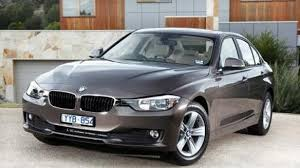
 
## For building a Machine Learning model their are four major steps involved:-
 
1.Data Preprocessing

In Machine Learning, data preprocessing is the step in which the data gets transformed or encoded to bring it to such a state that now the Machine can easily sparse it. In other words, the features of the data can now be easily interpreted by the algorithm. 
 
2.Exploratory Data Analysis 

In Machine Learning, EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
 
3.Algorithm Selection and Training 

After the initial two steps come the algorithm based training part. Machine Learning uses computational method to learn information directly from data. The algorithm adaptively improves the performance as the number of samples available for learning increases. The Machine Learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss.
 
4.Making Predictions

Once you choose and fit a final Machine Learning model in Scikit Learn, you can use it to make predictions on new data instances. Prediction refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcome.


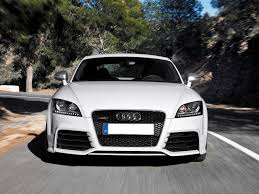

## **Step 1: Importing the Dataset and the necessary libraries, check data type, statistical summary,shape, null values, etc.**

In [2]:
#import some necessary libraries
import numpy as np                              # LInear Algebra
import pandas as pd                             #Data Preprocessing CSV file I/O
import matplotlib.pyplot as plt                 #Matlab style plotting
% matplotlib inline
 
from scipy import stats
from scipy.stats import norm, skew              #for some statistics, if rerequired
 
import seaborn as sns

import warnings
def ignore_warn(*args,**kwargs):
   pass
warnings.warn= ignore_warn                      #ignore warnings(from sklearn and seaborn)
 
import plotly.graph_objects as go               #for designing of graphs
import plotly.express as px

In [3]:
#files.upload returns a dictionary of the files which were uploaded. The dictionary is keyed by the file name and values are the data of the dataset which were uploaded.
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


***1.1 Loading the data into the DataFrame and Reading it.***

In [4]:
#Loading the CSV file onto Google Colab followed by reading it.
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [5]:
#Reading the complete dataset.
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [7]:
#To dispay the top 5 rows
df.head (5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
#To display the bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


***1.2 Checking the Datatype of each Column.***


In [9]:
#Listing the Column Names of the DataFrame.
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [10]:
#Checking the datatypes of different columns of the dataframe.
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
#Now we check the datatype of each column of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

***1.3 Description of the Dataset.***

In [12]:
#The following function gives the statistical measures of the numerical values.
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


***1.4 Checking the Shape of the Dataset.***

In [13]:
#Now we print the shape of the dataset. It will be used quite often in this program. df.shape gives the result in the form of product of number of rows and number of columns.
df.shape

(11914, 16)

 We catch the shape of the column in order to get an idea of the number of rows and number of columns that our dataset contains.


 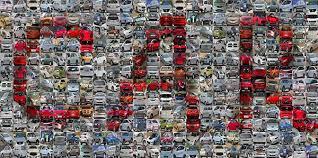

## **Step 2: Are there any columns in the dataset which you think are of less relevance. If so, give your reasoning and drop them.**

 Dropping columns is necessary because many times out dataset contains columns which are not very important in determining the characteristics of the dataset i.e. they are least correlated with our target variable. So dropping such columns is always better.

In [14]:
#Here we drop the column which seem to be least relevant.
df= df.drop(['Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [15]:
df.shape

(11914, 15)

## **Step 3: Rename the columns 'Engine HP':'HP', 'Engine Cylinders':'Cylinders','Transmission Type': 'Transmission', 'Driven_Wheels':'Drive Mode', 'highway MPG':'MPG-H', 'city mpg';MPG-C', 'MSRP':'Price'.**

In [17]:
#Renaming the column names as per mentioned in the problem statement.
df=df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price"})
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


Here we have renamed the columns just for our convenience. Because sometimes it may happen that the column names may be too long or can be confusing or unreadable. So in order to avoid such problems it is convenient and also a good practice to rename column names. This in turn improves the readability of the dataset and makes the content easy to understand.

In [18]:
df.shape

(11914, 15)

## **Step 4: Check for any duplicate in the data, null values and missing data and remove them.**

***4.1 First we check for any duplicates in our dataset and if present we remove them.***

Data Scientists very often come across very big datas which can be around 1K, 10K, 1M, 10M or any number. Here in this case we have dataset which contains more than 10K rows. So sometimes it does happen that such large datasets do contain some duplicate rows. So it's better to remove all the duplicate data which in a way reduces the data processing time.
This could be eliminated using the pandas.dataframe.duplicated() function.

In [19]:
#Now we check if our dataset contains any duplicates.
duplicate_rows_df=df[df.duplicated()]
print ("number of duplicate rows:",duplicate_rows_df.shape)

number of duplicate rows: (720, 15)


In [20]:
#Removing the duplicate data from our dataset.
df=df.drop_duplicates()
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [21]:
df.shape

(11194, 15)

In [22]:
#Let's check if their are any more duplicate rows.
df.duplicated().sum()

0

So here all the duplicate rows are removed. And only a single copy of such duplicate data is now available in the dataset.

***4.2 Now we check if our dataset contains any null any missing values and then remove them.***

Python libraries represent missing values as NAN which is an abbreviation for 'Not a Number'. Building a model using data with missing values will give an error. So we need to deal with missing values.

In [23]:
#Checking for any null values in the dataset.
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

So their are in general Two ways of handling the missing values.
1.Dropping the Missing Values
  One way is to drop columns containing the missing values. But if those columns had useful information, then the model may lose access to the information when the column is dropped. So somewhere it's not the best solution. However it can be useful when most values in a column are missing.
2.Impute columns with missing values
  Imputation fills the missing values with some numbers. The imputed value won't be correct in most cases, but it usually gives more accurate models than dropping the column entirely.

Here we will now either remove the null values from our dataset or impute the missing values. But it is better to impute the missing values rather than to remove them. 
So their are many ways of imputing the dataset like using mean, median, etc.
In this case we will be imputing the dataset using mean as the criterion. But for using mean as the criterion we need to ensure that our dataset contains no outliers. 
So first we will perform Step 5 and then impute the missing values.

## **Step 5: Plot graphs of various columns to check for outliers and remove those data points from the dataset.**

An outlier is a data point that is distant from other similar points. This may be due to variability in the measurement or may indicate experimental errors. Outliers are one of the main problems when building a predictive model. Indeed they cause Data Scientists to achieve more unsatisfactory results than they could. If possible outliers should be excluded from the dataset. However detecting the anomalous instances might be very difficult. So it is better to deal with such superior points by removing them.

In [25]:
#First we check our dataset.
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


One of the simplest methods for detecting outliers is the use of box plots. A box plot is a graphical display for describing the distributions of the data. Boxplots use the Median and the lower and upper quartiles.
From the dataset we can make out that all the numerical value data columns can have outliers so we draw boxplot for all of them and if their are any outliers present we eliminate them.

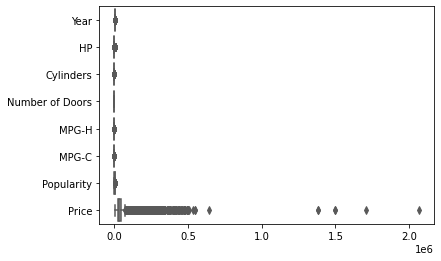

In [26]:
#Now we plot a boxplot for all the columns in the dataset as doing this gives us an idea of which column contains outliers.
sns.boxplot(data=df, orient= 'h', palette='Set2')

So from here we can infer that our price column has the outliers so we remove them.

In [27]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


So now we check for outliers considering all the column parameters individually. Plotting the boxplot of each continuous variable to find out outliers.

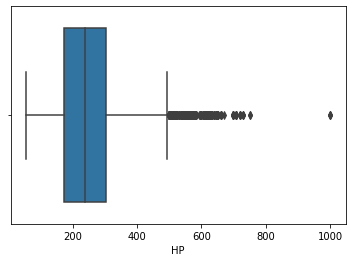

In [28]:
sns.boxplot(x=df['HP'])

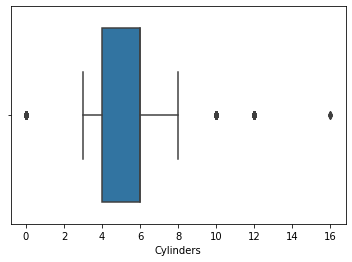

In [29]:
sns.boxplot(x=df['Cylinders'])

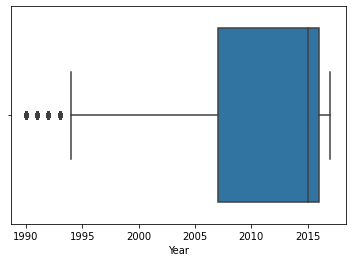

In [30]:
sns.boxplot(x=df['Year'])

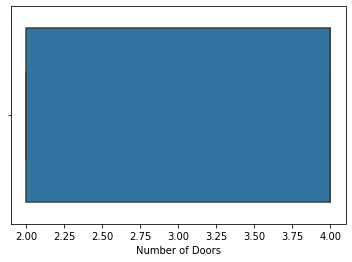

In [31]:
sns.boxplot(x=df['Number of Doors'])

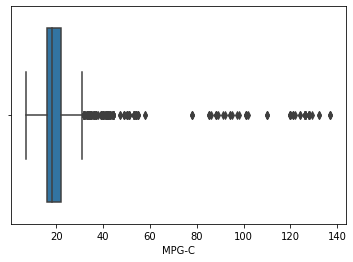

In [32]:
sns.boxplot(x=df['MPG-C'])

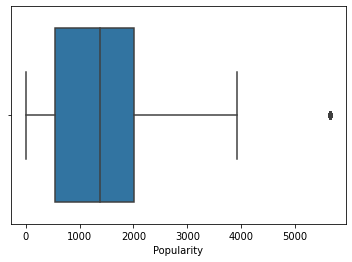

In [33]:
sns.boxplot(x=df['Popularity'])

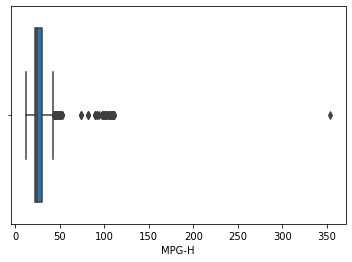

In [34]:
sns.boxplot(x=df['MPG-H'])

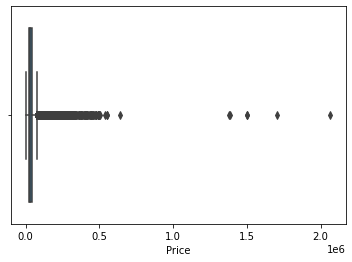

In [35]:
sns.boxplot(x=df['Price'])

A boxplot tells us, more or less, about the distribution of the data. It gives the sense of how much the data is actually spread about, what's its range, and about its skewness.
As we can see from the figure,  a boxplot enables us to draw inferences from it for an ordered data, I.e., it tells us about the various metrics of a data arrange in ascending order. From the figure, minimum and maximum are the minimum and maximum value sun the dataset. So the difference between two tells us about the range of dataset. The median is called as the Second Quartile of the data. Q1 and Q3 are the first and third quartiles of the data respectively and they represent the 25% and 75% of the data respectively. The difference between Q3 and Q is called the Inter Quartile Range.

In [36]:
Q1 =df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3-Q1                #Calculating the IQR for each feature. 
print(IQR)                 #Printing the Inter Quartile Range for all the features.

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21439.5
dtype: float64


In [37]:

#Removing the outliers from the dataset.
df= df[~((df < (Q1-1.5 * IQR))|(df> (Q3+1.5 * IQR))).any(axis=1)]

In [38]:
df.shape

(8640, 15)

In [39]:
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


***Dropping or Imputing the Missing or Null Values***



Missing values can occur when no information is provided for one or more items or for a whole unit. Missing data is really important to get rid of. 
In order to check missing values in Pandas DataFrame, we use a function isnull() or notnull(). Both function help in checking whether a value is NaN or not. These functions can also be used in Pandas Series in order to find null values in a series.

In [41]:
print(df.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  11
Cylinders           19
Transmission         0
Drive Mode           0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


In [42]:
#Compute the Mean
mean_hp= df['HP'].mean()
mean_cy= df['Cylinders'].mean()


#Find the missing values with calculated mean
df['HP'].fillna(mean_hp, inplace=True)
df['Cylinders'].fillna(mean_cy, inplace=True)

In [43]:
print (df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [44]:
#Here we see the number of non-null values  that each column contains. 
df.count()

Make                8640
Model               8640
Year                8640
Engine Fuel Type    8637
HP                  8640
Cylinders           8640
Transmission        8640
Drive Mode          8640
Number of Doors     8640
Vehicle Size        8640
Vehicle Style       8640
MPG-H               8640
MPG-C               8640
Popularity          8640
Price               8640
dtype: int64

In [45]:
df.shape

(8640, 15)

Now as we can see all the null integer values have been imputed. And only the non- numeric null values are present. We instead of imputing them will drop all those values. 

In [46]:
#Now we will remove all the remaining null values in the dataset by dropping them.
df.dropna(inplace=True, axis=0)


In [47]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [48]:
df.count()

Make                8637
Model               8637
Year                8637
Engine Fuel Type    8637
HP                  8637
Cylinders           8637
Transmission        8637
Drive Mode          8637
Number of Doors     8637
Vehicle Size        8637
Vehicle Style       8637
MPG-H               8637
MPG-C               8637
Popularity          8637
Price               8637
dtype: int64

In [49]:
df.shape

(8637, 15)

## **Step 6: What car brands are the most represented in the dataset and find the average price among the top car brands.**

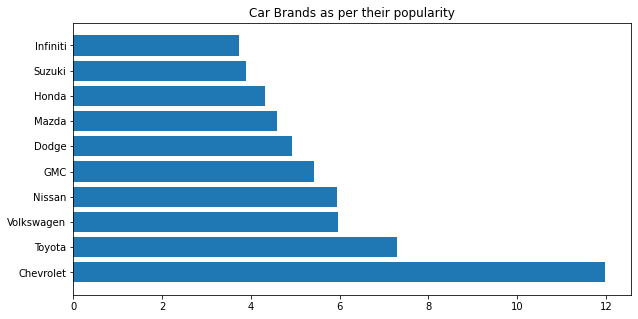

In [50]:
#Calculating percentage of each car brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())
 
#Top 10 Car Brands
popular_labels=counts.index[:10]
 
#Plotting the top 10 brands represented in the dataset.
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Car Brands as per their popularity')
plt.show()

In [51]:
#Looking at the number of Sales made of each Car Brand as per the given data.
brands= df['Make'].value_counts()
brands[:10]

Chevrolet     1034
Toyota         629
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          397
Honda          373
Suzuki         336
Infiniti       322
Name: Make, dtype: int64

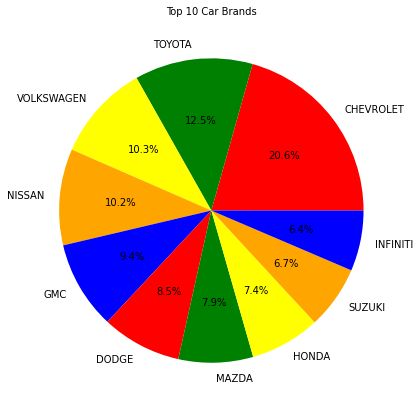

In [60]:
#Plotting a Pie Chart representing the distribution among the top 10 selling brands.
carr=df['Make'].value_counts().head(5).to_frame()
m=carr.style.background_gradient(cmap='Blues')
colors=['red','green','yellow','orange','blue']
labels=['CHEVROLET','TOYOTA','VOLKSWAGEN','NISSAN','GMC','DODGE','MAZDA','HONDA','SUZUKI','INFINITI']
sizes=['1034','629','515','513','469','425','397','373','336','322']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=df['Make'].value_counts().head(10).to_frame()

#Visualization 
plt.figure(figsize=(7,7))
plt.title('Top 10 Car Brands',color='black',fontsize=10)
plt.pie(values,explode=None, labels=labels, colors=colors,autopct='%1.1f%%')
plt.show()

So from the above bar plot it is clear that the most represented car brand as per the dataset is "Chevrolet" followed by "Toyota ","Volkswagen","Nissan","GMC","Dodge","Mazda","Honda","Suzuki","Infiniti" and so on.

In [61]:
#Calculating the average price of top 10 Car Brands.
prices = df[['Make','Price']].loc [ (df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()

In [62]:
print(prices)

                   Price
Make                    
Chevrolet   28252.488395
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20830.670025
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


In [63]:
display_p=df[['Make','Year','Price']].loc[(df['Make'].isin(popular_labels))]
 
fig=px.box(display_p,x="Make",y="Price")
fig.update_layout(title_text='Average Price of top 10 Car Brands',xaxis_title="Make",yaxis_title="Average Price")

## **Step 7: Plot Correlation Matrix and document your insights.**

Variables within a dataset can be related in many ways.
1.One variable can cause or depend on the values of another variable.
2.One variable could be lightly associated with another variable. 
3.Two variables could depend on a third unknown variable. 
It can be useful in Data Analysis and Modeling to better understand the relationship between variables. The statistical relationship between two variables is referred to as their Correlation.

Correlation coefficients quantify the association between variables or features of a dataset. These statistics are of higher importance for science and technology and Python has great tools that you can use to calculate them. SciPy, NumPy and Pandas Correlation methods are fast, comprehensive and well documented. 
 
The Correlation matrix can be used to estimate the Linear historical relationship between the returns of multiple assets. You can use the built-in.corr() method on a Pandas DataFrame to easily calculate the Correlation matrix. Correlation ranges from -1 to 1.

A Correlation could be positive, meaning both variables move in the same direction,  or, negative, meaning that when the value of one variable increases, the value of another variable decreases. Correlation can also be neutral or zero, meaning that variables are unrelated. 

Positive Correlation: Both variables change simultaneously. 
Negative Correlation: Both variables change oppositely. 
Neutral Correlation: No relationship in the change of variables.

In [64]:
#Finding the correlation between different variables.
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329968,-0.094073,0.242411,0.359775,0.323571,0.204387,0.592560
HP,0.329968,1.000000,0.740840,0.044540,-0.464798,-0.562633,0.105683,0.742379
Cylinders,-0.094073,0.740840,1.000000,0.024506,-0.697480,-0.750383,0.025525,0.391904
Number of Doors,0.242411,0.044540,0.024506,1.000000,0.004050,0.020931,-0.074200,0.132982
MPG-H,0.359775,-0.464798,-0.697480,0.004050,1.000000,0.937960,0.081991,-0.127208
MPG-C,0.323571,-0.562633,-0.750383,0.020931,0.937960,1.000000,0.071732,-0.201900
Popularity,0.204387,0.105683,0.025525,-0.074200,0.081991,0.071732,1.000000,0.115546
Price,0.592560,0.742379,0.391904,0.132982,-0.127208,-0.201900,0.115546,1.000000


Heatmap

A Heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses colors in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matters the most when you have a large volume of data.

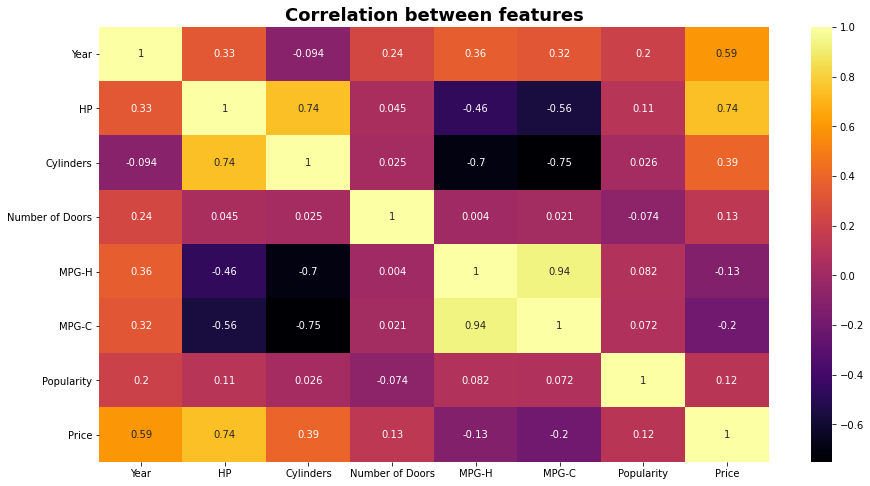

In [65]:
#Plotting the heatmap for different features.
df_corr=df.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(df_corr,cmap='inferno',annot=True)
plt.title("Correlation between features", weight='bold', fontsize=18)
plt.show()

From the above heatmap, we can see that, their is:
 
**High Correlation between:**
1. Cylinders and HP
2. MPG-H and MPG-C
3. HP and Price
4. Price and Year
5. Cylinders and Price
**So we can conclude that the price is greatly dependent on Year, HP and Cylinders.(So this means that Horsepower, Number of Cylinders and the Year of Production are the major factors contributing towards the Price of the Car.**
 
**High Anticorrelation between:**
1. Cylinders and MPG-H
2.Cylinders and MPG-C
3.HP and MPG-H
4.HP and MPG-C
**So we can conclude that as the number of cylinders and HP is increased, the MPG-H and MPG-C decreases.**

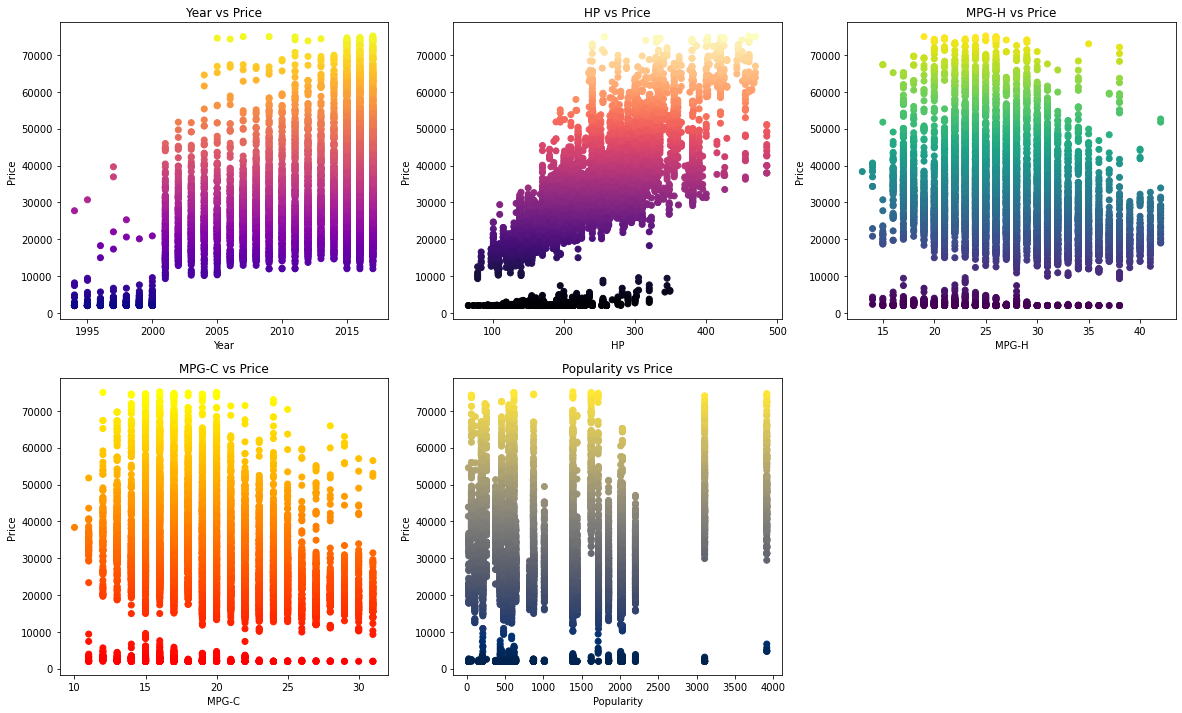

In [78]:
#Plotting the box plot of each continuous variable to find if any outlier is left.
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
plt.title("Year vs Price")
plt.scatter(df["Year"],df["Price"],c=df['Price'],cmap='plasma')
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.title("HP vs Price")
plt.scatter(df["HP"],df["Price"],c=df['Price'],cmap='magma')
plt.xlabel("HP")
plt.ylabel("Price")

plt.subplot(2,3,3)
plt.title("MPG-H vs Price")
plt.scatter(df["MPG-H"],df["Price"],c=df['Price'],cmap='viridis')
plt.xlabel("MPG-H")
plt.ylabel("Price")

plt.subplot(2,3,4)
plt.title("MPG-C vs Price")
plt.scatter(df["MPG-C"],df["Price"],c=df['Price'],cmap='autumn')
plt.xlabel("MPG-C")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.title("Popularity vs Price")
plt.scatter(df["Popularity"],df["Price"],c=df['Price'],cmap='cividis')
plt.xlabel("Popularity")
plt.ylabel("Price")

plt.show()

***ScatterPlot***

Plotting each continuous variable/column to see what is the correlation between them.
We will do this task of Visualization with the help of Scatter Plot. Scatter Plot is a graph in which the values of two variables are plotted along two axes. It is most basic type of plot that helps you visualize the relationship between two variables.

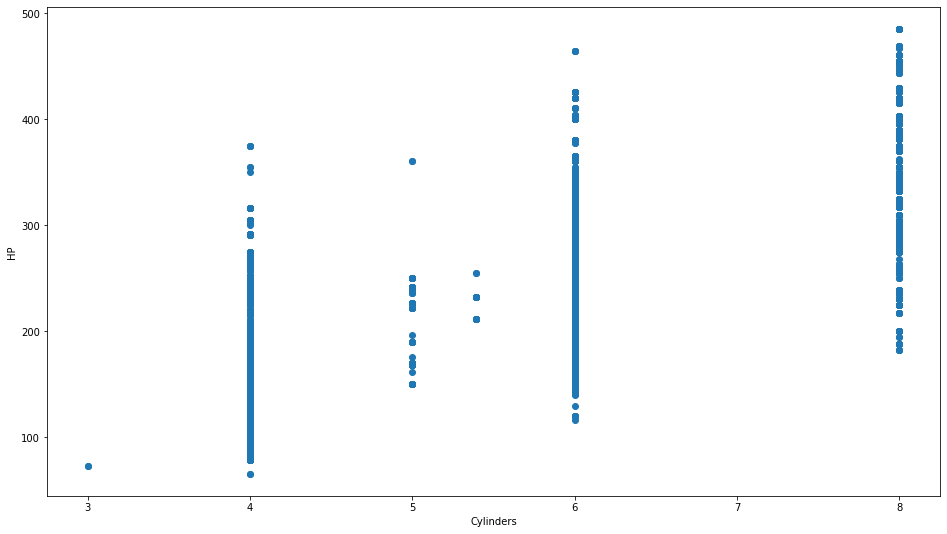

In [79]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['Cylinders'], df['HP'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('HP')
plt.show()

The above graph shows that cYLINDER IS POSITIVELY CORRELATED WITH HP.
The cars with more number of cylinders generally have a higher HP.

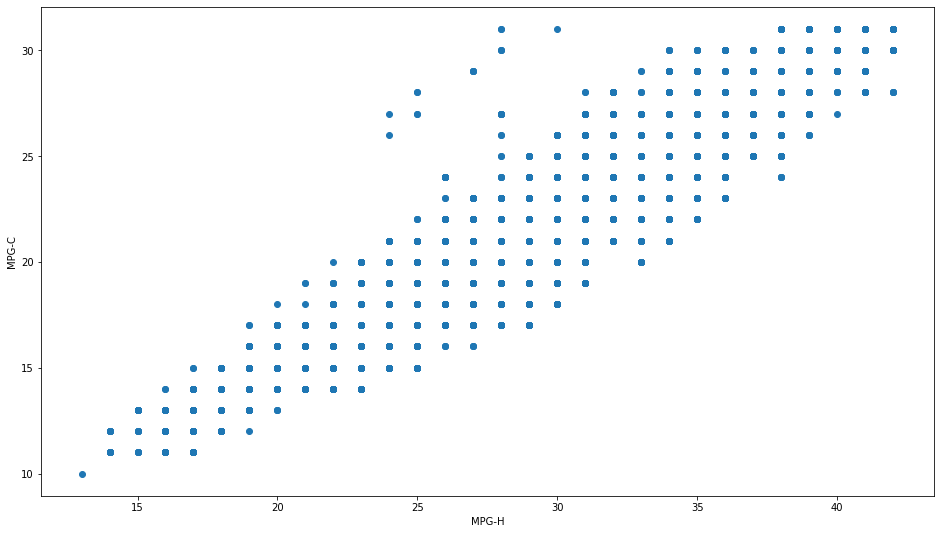

In [80]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['MPG-H'], df['MPG-C'])
ax.set_xlabel('MPG-H')
ax.set_ylabel('MPG-C')
plt.show()

MPG-H and MPG-C are highly correlated. So as one quantity increases other too increase and vice versa.

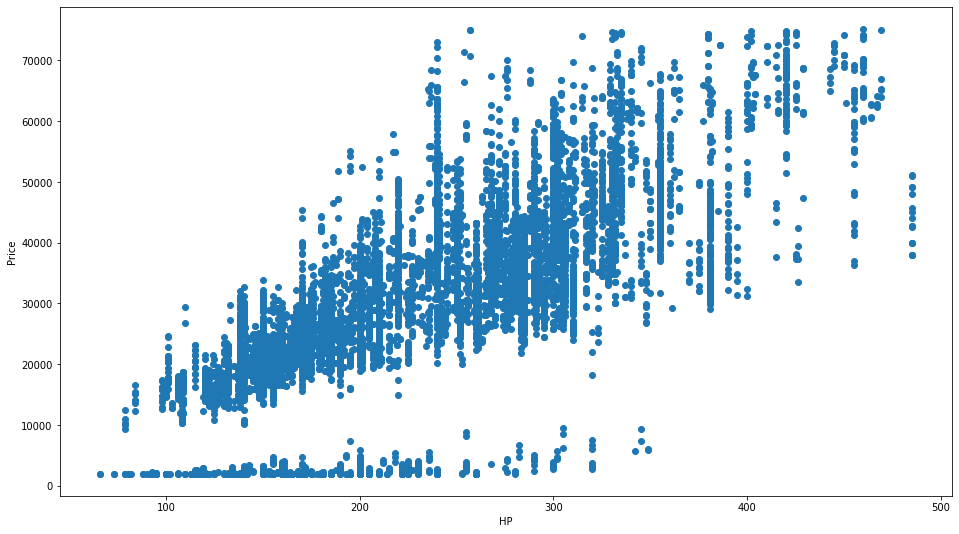

In [81]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

HP and Price are highly correlated. Thus more the HP value, more is the price of the car.

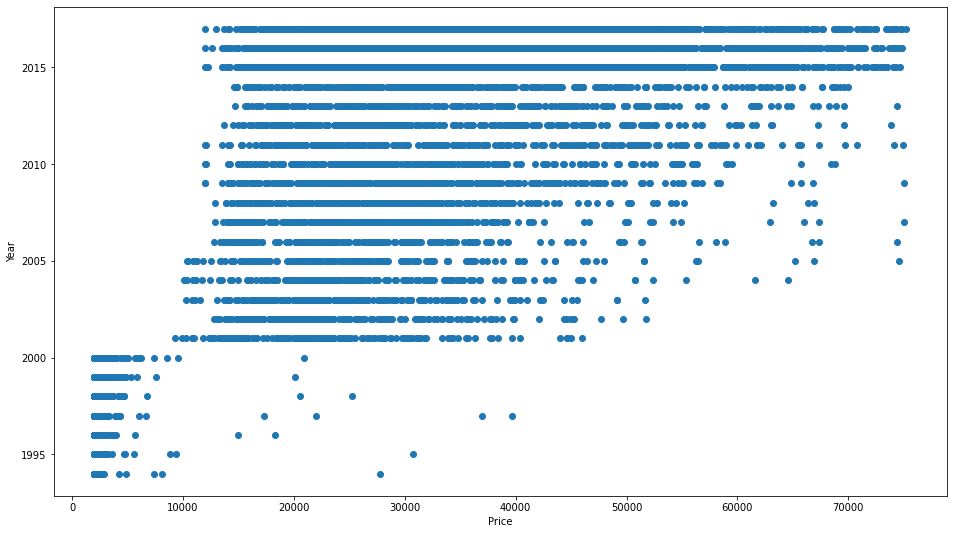

In [82]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['Price'], df['Year'])
ax.set_xlabel('Price')
ax.set_ylabel('Year')
plt.show()

Year and Price are highly correlaed. So it shows that with time the price of car has increased.

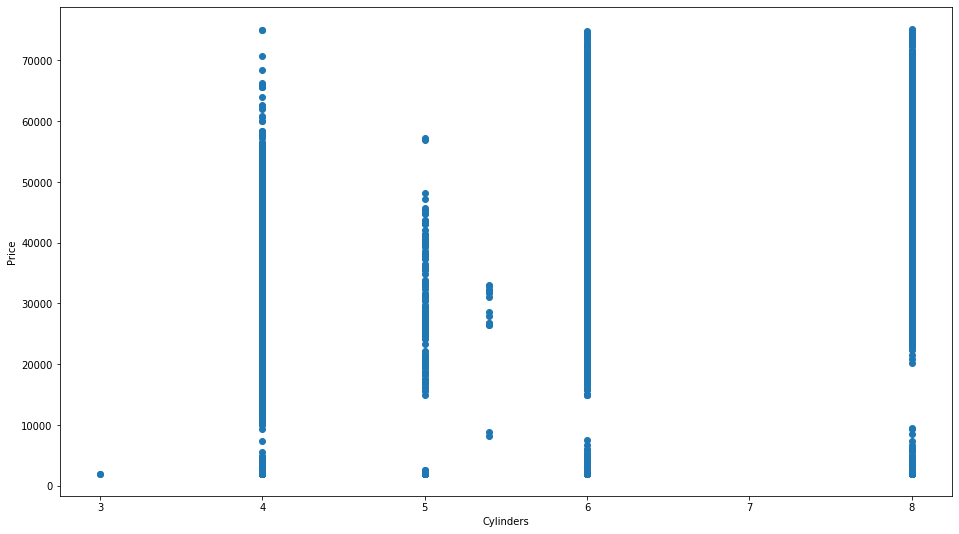

In [83]:
fig, ax = plt.subplots(figsize=(16,9))
ax.scatter(df['Cylinders'], df['Price'])
ax.set_xlabel('Cylinders')
ax.set_ylabel('Price')
plt.show()

Price and cylinders are positively correlated. So here more the number of Cylinders a car has greater is the price of the car.

## Step 8: Perform EDA and plot different graphs and document your findings.

A bar chart or bar graph is a chart or graph that prsents Categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally. A bar graph shows comparison among discrete categories.

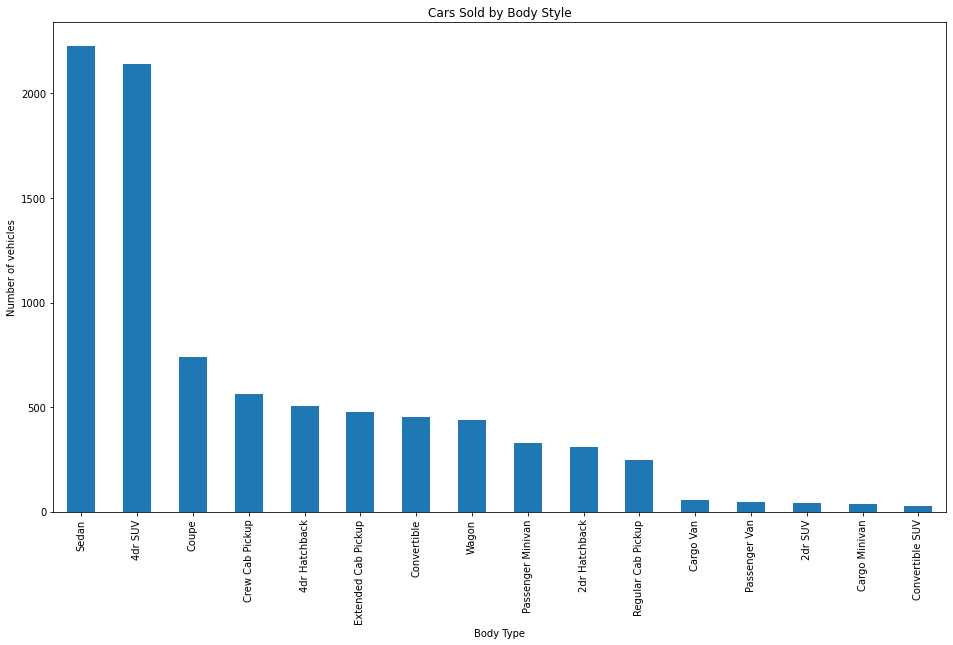

In [84]:
df['Vehicle Style'].value_counts().plot.bar(figsize=(16,9))
plt.title("Cars Sold by Body Style")
plt.ylabel('Number of vehicles')
plt.xlabel('Body Type');

Vehicle Style Type and Drive Type Analysis

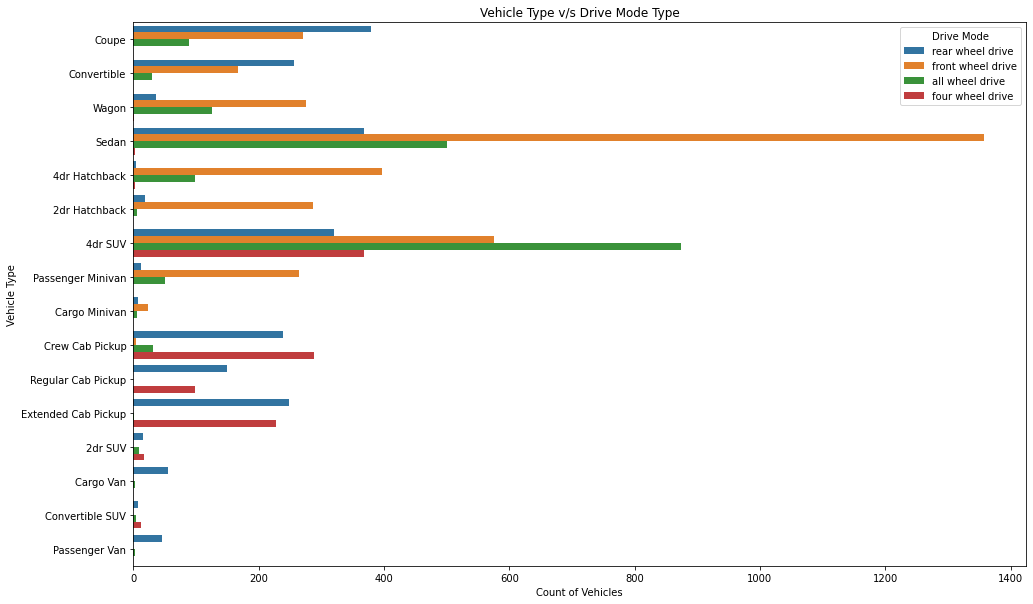

In [85]:
plt.figure(figsize=(16,10))
sns.countplot(y='Vehicle Style', data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive Mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of Vehicles')
plt.show()

1. Transmission type "Automatic" is highest in selling, followed by the "Manual" segment.
2. "Front Wheel Drive Mode" is the highest selling in terms of drive mode mostly preferred.
3."Compact" and "Smal" are mostly sold in terms of car size followed by "Large" 
4. "Sedan-Midsize" and "4dr SUV-Midsize" are the highest selling cars.

In [86]:
#Creating a new column 'Price Group' for easy visualization.
def getrange(Price):
  if (Price >= 0 and Price < 20000):
    return '0 - 20K'
  if (Price >=20000 and Price < 39000):
    return '20k - 39k'
  if (Price >=40000 and Price < 59000):
    return '40K - 59K'
  if (Price >=60000 and Price < 79000):
    return '60K - 89K'
  if (Price >=80000 and Price < 99000):
    return '80k - 99K'
  if (Price >= 100000):
    return '>100k'
df['Price Group'] = df.apply(lambda x: getrange(x['Price']),axis=1)

df['Price Group'].value_counts()

20k - 39k    4602
40K - 59K    1721
0 - 20K      1707
60K - 89K     399
Name: Price Group, dtype: int64

In [115]:
#Creating a new column 'Price Group' and assigning the value based on car price
df['Price Group']=pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest=True)
df['Price Group']=df['Price Group'].astype(object)

Text(0.5, 0, 'Price Group')

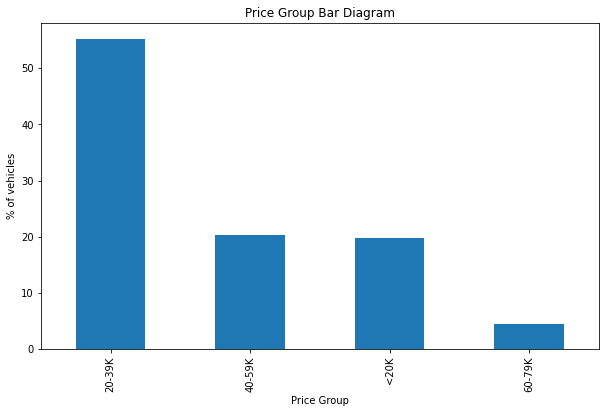

In [116]:
(df['Price Group'].value_counts()/len(df)*100).plot.bar(figsize=(10,6))
plt.title("Price Group Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group')

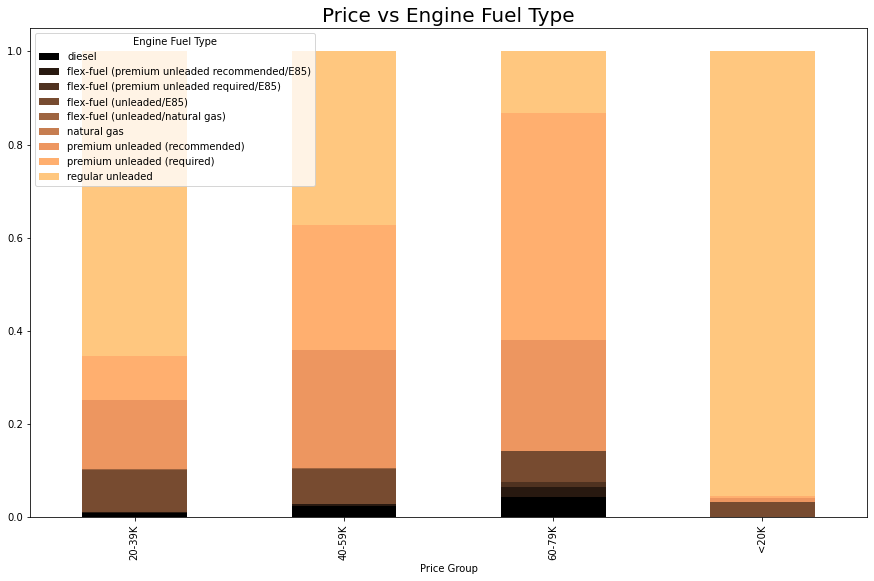

In [117]:
plt.rcParams['figure.figsize']=(15,9)
 
x=pd.crosstab(df['Price Group'],df['Engine Fuel Type'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, color=color)
plt.title("Price vs Engine Fuel Type", fontweight=30, fontsize=20)
plt.show()

So we can observe that for lower price range, the engine fuel type is "Regular Unleaded" while for higher prices it is "Premium Unleaded". Therefore we can say that Engine Fuel Type depends on the Price Group.





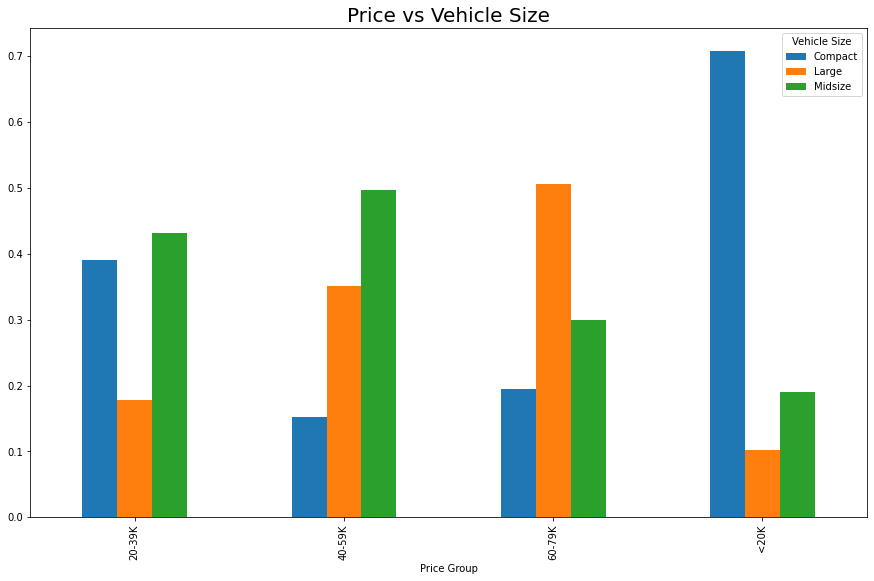

In [118]:
plt.rcParams['figure.figsize']=(15,9)
 
x=pd.crosstab(df['Price Group'],df['Vehicle Size'])

x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title("Price vs Vehicle Size", fontweight=30, fontsize=20)
plt.show()

Here we notice that as the prices increase their is gradual decrease in "compact' vehicle size while increase in "midsize" and "large" vehicles sizes. Hence, its also a price dependent feature. 

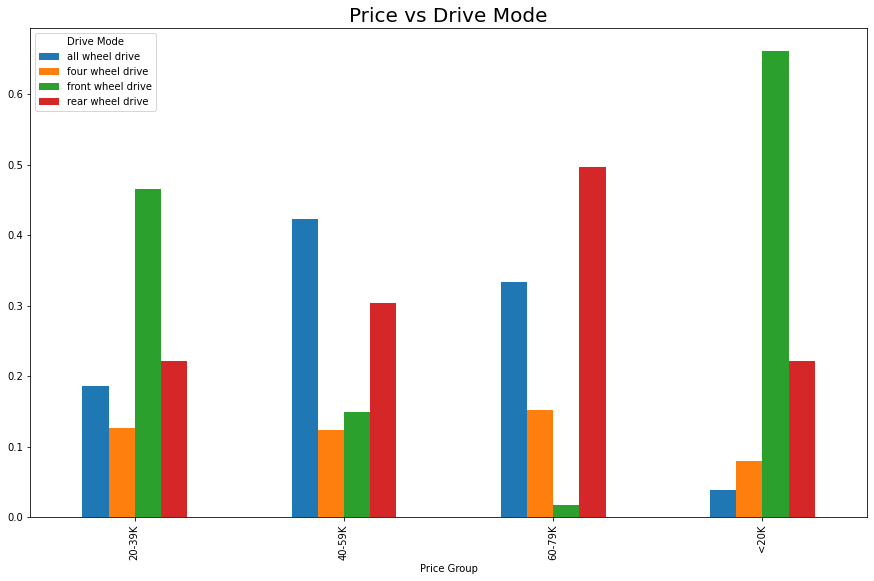

In [119]:
plt.rcParams['figure.figsize']=(15,9)
 
x=pd.crosstab(df['Price Group'],df['Drive Mode'])

x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title("Price vs Drive Mode", fontweight=30, fontsize=20)
plt.show()

Here we see that as the prices increase, there is decrease in "front wheel drive mode" while an increment in "all wheel drive mode" amd "rear wheel drive mode". There Drive Mode also depends on prices of cars.

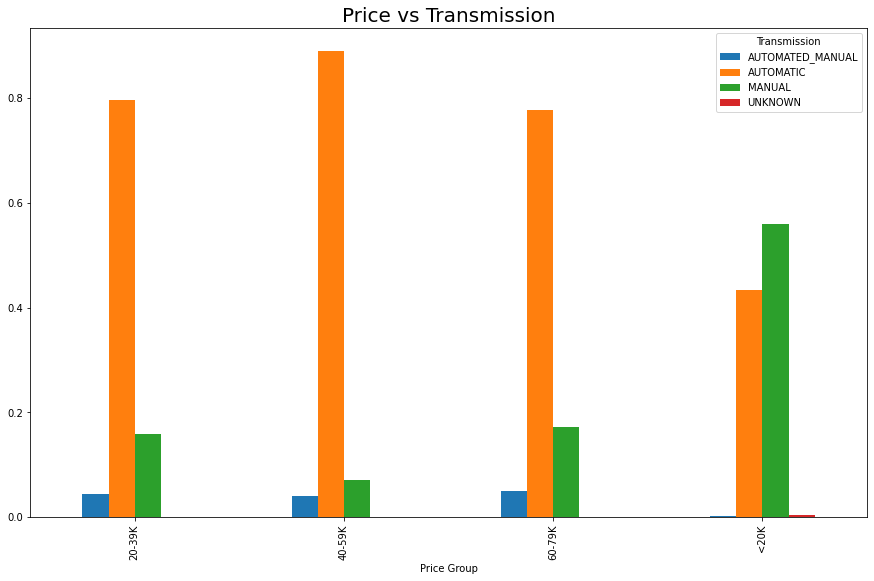

In [120]:
plt.rcParams['figure.figsize']=(15,9)
 
x=pd.crosstab(df['Price Group'],df['Transmission'])

x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False)
plt.title("Price vs Transmission", fontweight=30, fontsize=20)
plt.show()

Therfore, for all price groups the transmission type is "automatic". So Transmission type does not depend on prices.

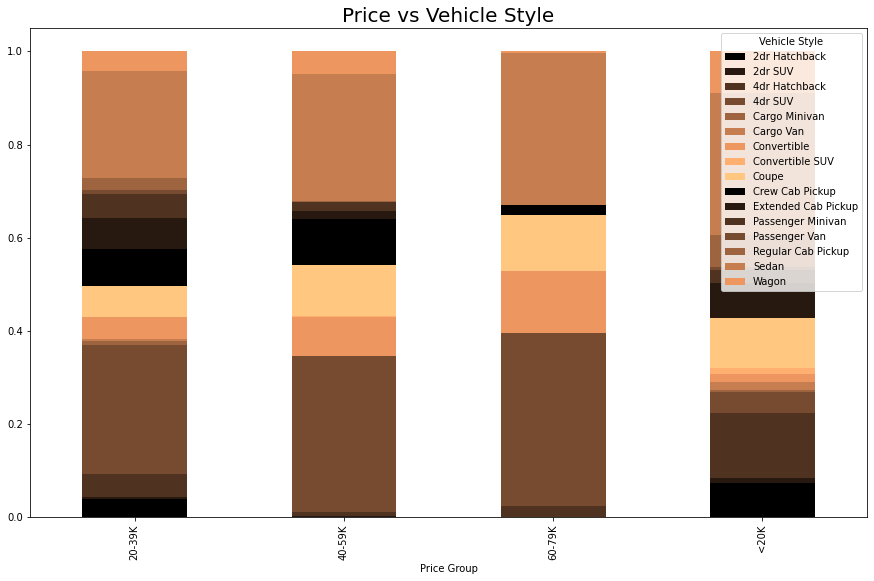

In [121]:
plt.rcParams['figure.figsize']=(15,9)
 
x=pd.crosstab(df['Price Group'],df['Vehicle Style'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True, color=color)
plt.title("Price vs Vehicle Style", fontweight=30, fontsize=20)
plt.show()

Now here we can see that the Trend of 2 most prefered vehicle style with an increment in price group are

4dr SUV and Sedan.

In [122]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Group,price_group
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,40-59K,40-59K
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40-59K,40-59K
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,20-39K,20-39K
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,20-39K,20-39K
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,20-39K,20-39K


In [123]:
df.shape

(8637, 17)

In [102]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Cylinders',
       'Transmission', 'Drive Mode', 'Number of Doors', 'Vehicle Size',
       'Vehicle Style', 'MPG-H', 'MPG-C', 'Popularity', 'Price', 'Price Group',
       'price_group'],
      dtype='object')

## **Step 9: Split the dataset into 80 and 20 ratio and build a Machine Learning Model with Price as the target variable.**

**Label Encoding**

Label Encoding refers to converting the labels into numeric form so as to convert it into machine readsable form. Machine Learning algorithms can then decide in a better way on how those labels must be operated. It is an important preprocessing step for the structured dataset in Supervised Learning.

In [125]:
#For Label Encoder, data types need to be categorical.
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style','Price Group']
df[columns_to_convert]=df[columns_to_convert].astype('category')

In [126]:
df.dtypes

Make                category
Model               category
Year                   int64
Engine Fuel Type    category
HP                   float64
Cylinders            float64
Transmission        category
Drive Mode          category
Number of Doors      float64
Vehicle Size        category
Vehicle Style       category
MPG-H                  int64
MPG-C                  int64
Popularity             int64
Price                  int64
Price Group         category
price_group           object
dtype: object

In [135]:
from sklearn import preprocessing

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encode labels in columns 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style','Price Group']: df[col] = label_encoder.fit_transform(df[col])


In [136]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Group,price_group
0,3,1,2011,7,335.0,6.0,2,3,2.0,0,8,26,19,3916,46135,1,40-59K
1,3,0,2011,7,300.0,6.0,2,3,2.0,0,6,28,19,3916,40650,1,40-59K
2,3,0,2011,7,300.0,6.0,2,3,2.0,0,8,28,20,3916,36350,0,20-39K
3,3,0,2011,7,230.0,6.0,2,3,2.0,0,8,28,18,3916,29450,0,20-39K
4,3,0,2011,7,230.0,6.0,2,3,2.0,0,6,28,18,3916,34500,0,20-39K


In [137]:
#Splitting the Dependent and Independent variables. So here we seperate our target variable from the rest of the data.

X=df[['Year','HP','Cylinders','MPG-H','MPG-C','Popularity']].values
Y=df['Price'].values

print(X.shape)
print(Y.shape)


(8637, 6)
(8637,)


In [139]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_Y = StandardScaler()

X=sc_X.fit_transform(X)
Y=sc_Y.fit_transform(Y.reshape(-1,1))


**Splitting th Dataset into Test set and Training set.**

So here we split our dataset into trainig set and test set. Most of the data is used for trainig and a small portion of it is used for testing. Analysis Services randomly samples the data to ensure that the trainig and test sets are similar.

In [140]:
#Splitting the dataset into training and test sets.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

#Printing the Independent and Dependent variable count of Training and Test set.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(6909, 6)
(1728, 6)
(6909, 1)
(1728, 1)


## **Step 10: Try different algorithms and check their performance over metrics like R square, RMSE, MAE, etc. and document your findings.**

**Predictive Modelling**

Predictive Modelling is a powerful way to add intelligence to your application. It enables applications to predict outcomes against new data. The act of incorporating predictive analytics into your applications involves two major phases:
Model Training and
Model Deployment.

### **LINEAR REGRESSION**

Linear Regression is a basic and most commonly used type of predictive analysis. The overall idea of regression is to examine two things:
1. Does a set of predictor variables do a good job in predicting outcome (dependent) variable?
2. Which variables in particular arew significant predictors of the outcome variable, and in what way do they-indicated by the magnitude and sign of the Beta estimate-impact the outcome variable?

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.

In [141]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)
 
#Calculating the accuracies.
print("Trainig Accuracy :",lr_model.score(X_train,Y_train))
print("Testing Accuracy:",lr_model.score(X_test,Y_test))

Trainig Accuracy : 0.6949517892342729
Testing Accuracy: 0.668675196379516


In [142]:
Y_pred = lr_model.predict (X_test)
Y_pred[0:5]

array([[-0.2390448 ],
       [ 0.54533717],
       [ 1.02290397],
       [-0.4364974 ],
       [ 0.69554421]])

Text(0, 0.5, 'Predicted Values')

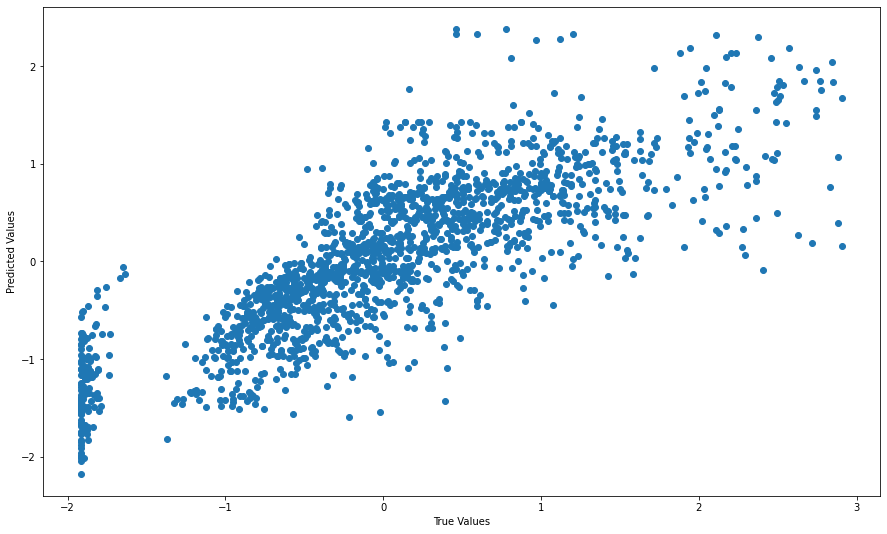

In [143]:
plt.scatter (Y_test,Y_pred)
plt.xlabel ("True Values")
plt.ylabel ("Predicted Values")

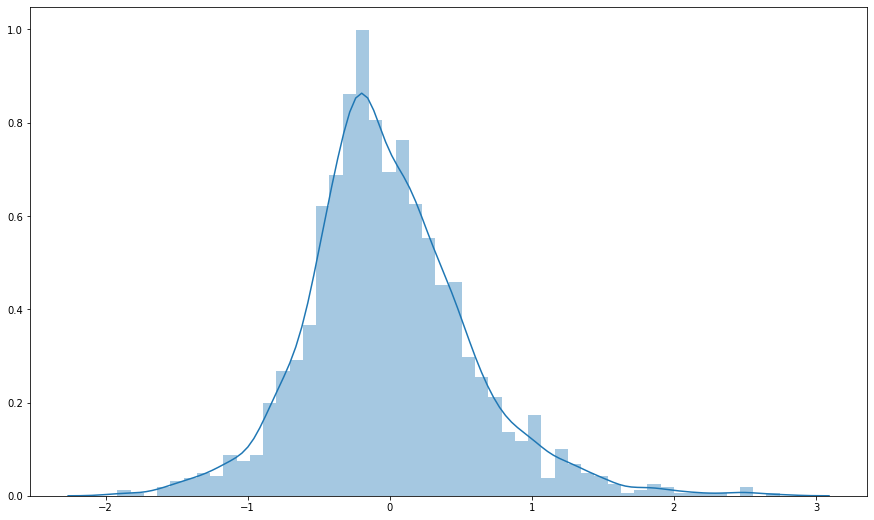

In [144]:
sns.distplot((Y_test-Y_pred),bins=50)

In [146]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print ("R2 Score:", r2_score(Y_test,Y_pred))
print ("Mean Squared Error:", mean_squared_error(Y_test,Y_pred))
print ("Mean Absolute Error:", mean_absolute_error(Y_test,Y_pred))
print ("Root Mean Square Error:", math.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 Score: 0.6686751963795159
Mean Squared Error: 0.32979370699918714
Mean Absolute Error: 0.433966315800707
Root Mean Square Error: 0.574276681573601


## **SUPPORT VECTOR MACHINE**
 
"Support Vector Machine"(SVM) is a supervised machine learning algorithm which can be used for both Classification and Regression problems. However it is mostly used in Classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinates.

In [150]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train,Y_train)
 
#Calculating the accuracies.
print("Trainig Accuracy :",svr_model.score(X_train,Y_train))
print("Testing Accuracy:",svr_model.score(X_test,Y_test))

Trainig Accuracy : 0.8261501103108361
Testing Accuracy: 0.7982553409663973


In [151]:
Y_pred = svr_model.predict (X_test)
Y_pred[0:5]

array([ 0.08867881,  1.11580331,  1.49865142, -0.79566376,  0.62809649])

Text(0, 0.5, 'Predicted Values')

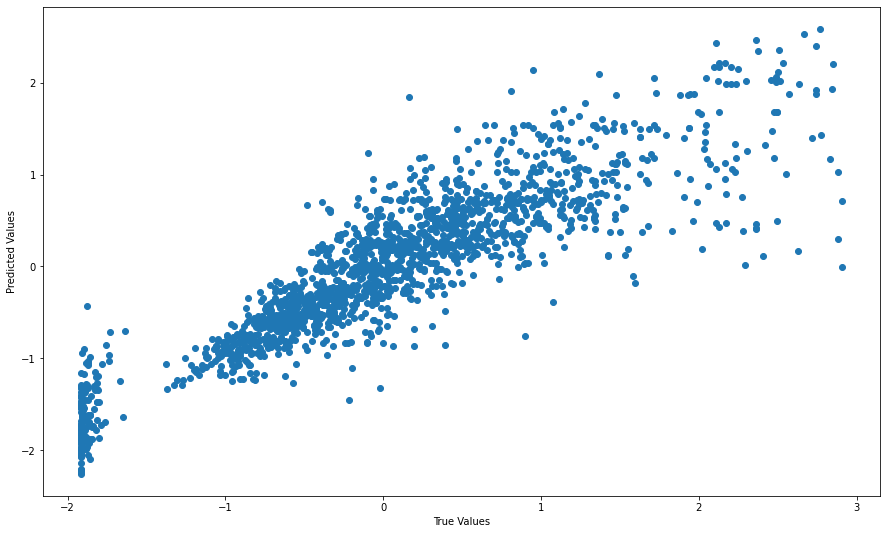

In [152]:
plt.scatter (Y_test,Y_pred)
plt.xlabel ("True Values")
plt.ylabel ("Predicted Values")

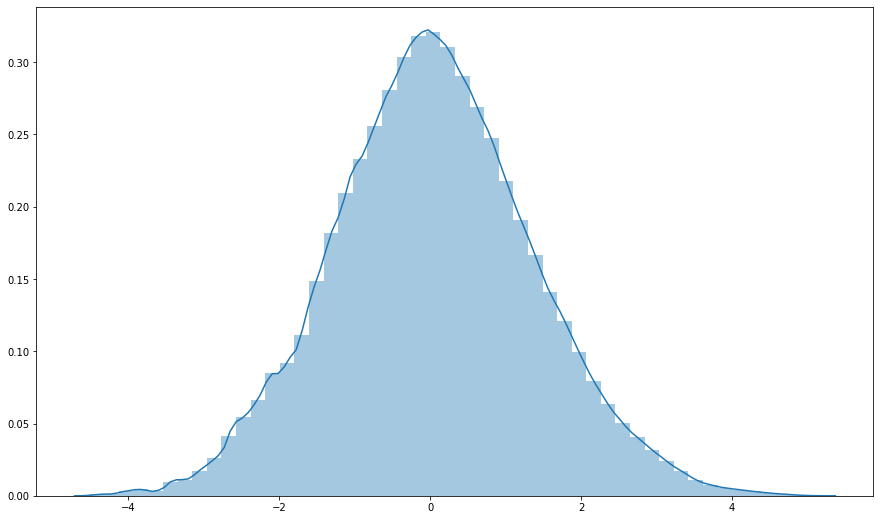

In [153]:
sns.distplot((Y_test-Y_pred),bins=50)

In [154]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print ("R2 Score:", r2_score(Y_test,Y_pred))
print ("Mean Squared Error:", mean_squared_error(Y_test,Y_pred))
print ("Mean Absolute Error:", mean_absolute_error(Y_test,Y_pred))
print ("Root Mean Square Error:", math.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 Score: 0.7982553409663973
Mean Squared Error: 0.20081236974395184
Mean Absolute Error: 0.30896905489050214
Root Mean Square Error: 0.4481209320528911


## **Decision Tree Regressor**
Decision Tree Learning is one of the predictive modelling approaches used in statistics, data mining, and machine learning.
In Decision analysis, a decision tree can be used to visually and explicitly represent decision and decision making. In data mining, a decision tree describes data (but the resulting classification tree can be an input for decision making). This page deals with decision trees in data mining.


In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_model =DecisionTreeRegressor(random_state = 0)
dtr_model.fit(X_train,Y_train)
 
#Calculating the accuracies.
print("Trainig Accuracy :",dtr_model.score(X_train,Y_train))
print("Testing Accuracy:",dtr_model.score(X_test,Y_test))

Trainig Accuracy : 0.9695306986184505
Testing Accuracy: 0.92508591151929


In [ ]:
Y_pred = dtr_model.predict (X_test)
Y_pred[0:5]

array([ 0.24367849,  1.01744641,  1.57292129, -0.84184228,  0.1389903 ])

Text(0, 0.5, 'Predicted Values')

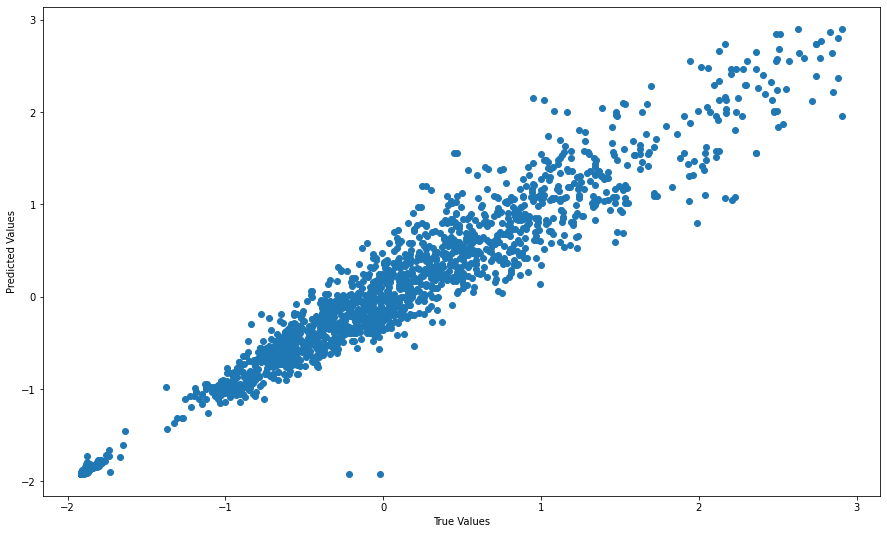

In [ ]:
plt.scatter (Y_test,Y_pred)
plt.xlabel ("True Values")
plt.ylabel ("Predicted Values")

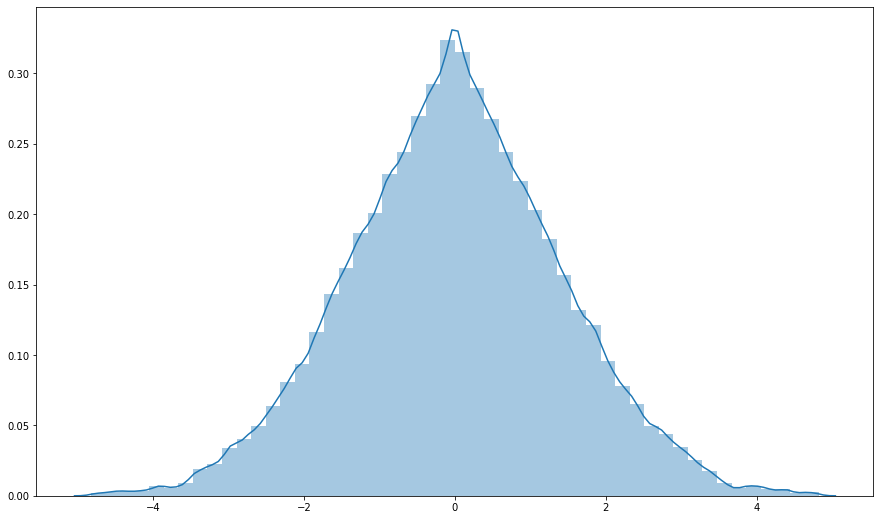

In [ ]:
sns.distplot((Y_test-Y_pred),bins=50)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print ("R2 Score:", r2_score(Y_test,Y_pred))
print ("Mean Squared Error:", mean_squared_error(Y_test,Y_pred))
print ("Mean Absolute Error:", mean_absolute_error(Y_test,Y_pred))
print ("Root Mean Square Error:", math.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 Score: 0.92508591151929
Mean Squared Error: 0.07456790037010982
Mean Absolute Error: 0.19303769423148365
Root Mean Square Error: 0.2730712368048122


## **RANDOM FOREST**

Random Forest is like bootstrapping algorithm with Decision Tree model (CART). Say, we have 1000 observations in the complete population with 10 variables. Random Forest tries to build multiple CART models with different samples and different initial values. For instance, it will take a random sample of 100 observations and 5 randomly chosen initial variables to build a CART model. It will repeat the process (say) 10 times and make a final prediction on each observation. Final Prediction is a function of each prediction. This final prediction can simply be the mean of each prediction.

In [156]:
from sklearn.ensemble import RandomForestRegressor

rfc_model = RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(X_train,Y_train)
 
#Calculating the accuracies.
print("Trainig Accuracy :",rfc_model.score(X_train,Y_train))
print("Testing Accuracy:",rfc_model.score(X_test,Y_test))

Trainig Accuracy : 0.9670734399037249
Testing Accuracy: 0.9303566183562864


In [157]:
Y_pred = rfc_model.predict (X_test)
Y_pred[0:5]

array([ 0.27800485,  1.14939253,  1.5354059 , -0.78956239,  0.12947956])

Text(0, 0.5, 'Predicted Values')

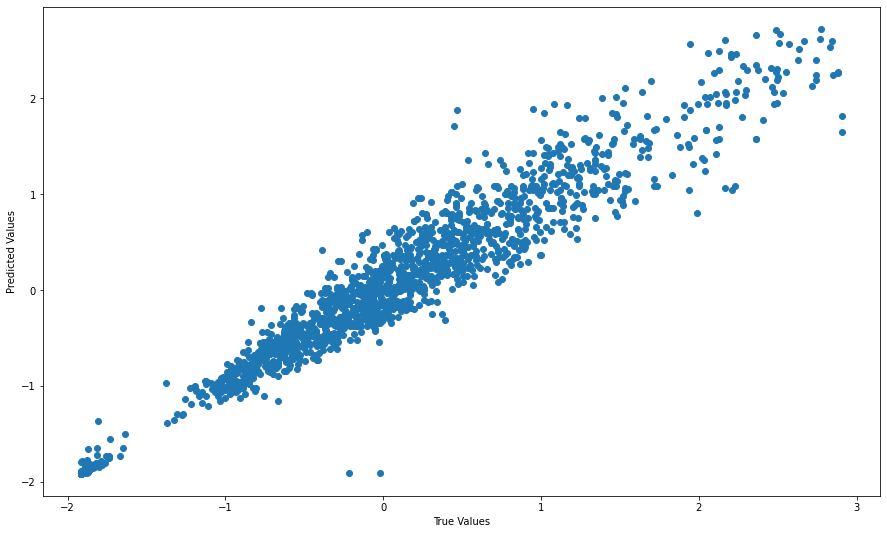

In [158]:
plt.scatter (Y_test,Y_pred)
plt.xlabel ("True Values")
plt.ylabel ("Predicted Values")

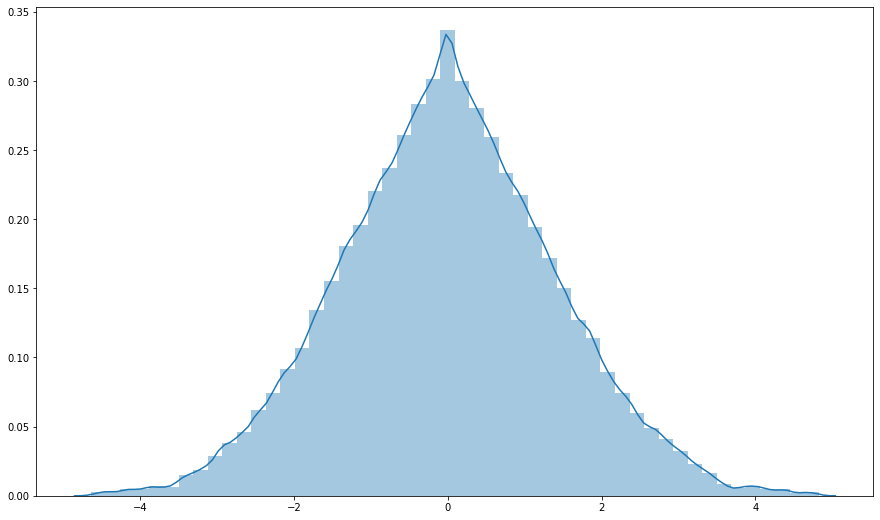

In [159]:
sns.distplot((Y_test-Y_pred),bins=50)

In [160]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

print ("R2 Score:", r2_score(Y_test,Y_pred))
print ("Mean Squared Error:", mean_squared_error(Y_test,Y_pred))
print ("Mean Absolute Error:", mean_absolute_error(Y_test,Y_pred))
print ("Root Mean Square Error:", math.sqrt(mean_squared_error(Y_test,Y_pred)))

R2 Score: 0.9303566183562864
Mean Squared Error: 0.06932155018055362
Mean Absolute Error: 0.186095283291453
Root Mean Square Error: 0.26328985962348345
